In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('AirPassengers.csv')

In [136]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [137]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

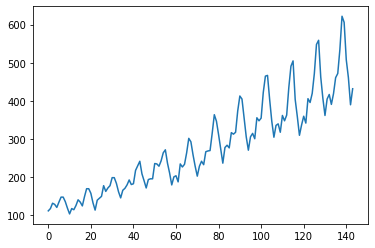

In [138]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[:,1])

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scale = MinMaxScaler(feature_range = (0,1))
df = scale.fit_transform(df.iloc[:,1:])
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [141]:
df.shape

(144, 1)

In [142]:
# splitting the training set
training_set = int(len(df)*0.65)

In [143]:
test_set = len(df) - training_set

In [144]:
train_data,test_data = df[0:training_set,:],df[training_set:len(df),:1]
test_data.shape

(51, 1)

In [145]:
def create_dataset(dataset,time_step = 1):
    X_data,y_data = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X_data.append(a)
        b = dataset[i+time_step,0]
        y_data.append(b)
    return np.array(X_data),np.array(y_data)

In [146]:
time_step = 4
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [147]:
y_train.shape

(88,)

In [148]:
# Reshape the array

X_train = X_train.reshape(X_train.shape[0],4,1)
X_test = X_test.reshape(X_test.shape[0],4,1)

In [164]:
X_train.shape
X_train

array([[[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556]],

       [[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208]],

       [[0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208]],

       [[0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606]],

       [[0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753]],

       [[0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ]],

       [[0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]],

       [[0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104]],

       [[0

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [170]:
model=Sequential()

In [171]:
model.add(LSTM(50,return_sequences = True, input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 1, verbose = 1)
# The LSTM input layer is defined by the input_shape argument on the first hidden layer.
# The input_shape argument takes a tuple of two values that define the number of time steps and features. 
# e number of samples is assumed to be 1 or more

NotImplementedError: Cannot convert a symbolic Tensor (lstm_6/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [172]:
train_pred = model.predict(X_train)
train_pred

array([[[0.01544402],
        [0.02702703],
        [0.05405406],
        [0.04826255]],

       [[0.02702703],
        [0.05405406],
        [0.04826255],
        [0.03281853]],

       [[0.05405406],
        [0.04826255],
        [0.03281853],
        [0.05984556]],

       [[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494209]],

       [[0.03281853],
        [0.05984556],
        [0.08494209],
        [0.08494209]],

       [[0.05984556],
        [0.08494209],
        [0.08494209],
        [0.06177606]],

       [[0.08494209],
        [0.08494209],
        [0.06177606],
        [0.02895753]],

       [[0.08494209],
        [0.06177606],
        [0.02895753],
        [0.        ]],

       [[0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]],

       [[0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104]],

       [[0

In [173]:
test_pred = model.predict(X_test)
test_pred

array([[[0.3899614 ],
        [0.32239383],
        [0.3899614 ],
        [0.4073359 ]],

       [[0.32239383],
        [0.3899614 ],
        [0.4073359 ],
        [0.38030887]],

       [[0.3899614 ],
        [0.4073359 ],
        [0.38030887],
        [0.4864865 ]],

       [[0.4073359 ],
        [0.38030887],
        [0.4864865 ],
        [0.47104248]],

       [[0.38030887],
        [0.4864865 ],
        [0.47104248],
        [0.484556  ]],

       [[0.4864865 ],
        [0.47104248],
        [0.484556  ],
        [0.6138996 ]],

       [[0.47104248],
        [0.484556  ],
        [0.6138996 ],
        [0.6969112 ]],

       [[0.484556  ],
        [0.6138996 ],
        [0.6969112 ],
        [0.7007722 ]],

       [[0.6138996 ],
        [0.6969112 ],
        [0.7007722 ],
        [0.57915056]],

       [[0.6969112 ],
        [0.7007722 ],
        [0.57915056],
        [0.46911198]],

       [[0.7007722 ],
        [0.57915056],
        [0.46911198],
        [0.3880309 ]],

       [[0

In [174]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,test_pred))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [178]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_pred)+time_step, :] = train_pred
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(time_step*2)+1:len(df)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (88,4,1) into shape (88,1)